# API-201 ABC REVIEW SESSION #3
**Friday, September 23**

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)

# Lecture Recap

A __random variable__ is a mathematical object that takes values at random according to some __distribution__. 

* Example 1: Let $Y$ be a random variable that represents the result of a fair coin flip, it equals 0 with probability 0.5 and 1 with probability 0.5.
* Example 2: Let $Y$ be a random variable that represents the number of tornadoes in Oklahoma City next year (see table from class).

In [1]:
# Simulate one tornado
num_tornadoes <- c(0, 1, 2, 3, 4, 5)
p <- c(.1, .15, .4, .2, .1, .05)

sample(num_tornadoes, 1, prob = p)

[1] 2

In [2]:
# Simulate many tornadoes
sample(num_tornadoes, 10, prob = p, replace = TRUE)

[1] 2 2 2 2 2 2 5 2 0 4

The _distribution_ links each value to a probability that value occurs.  What is the probability of drawing a 4? Will we ever draw a 7?

The first two examples are __discrete random variables__ because there are a countable number of values mapped to a countable number of probabilities. We say these random variables have __discrete probability distribution__.

A __continuous random variable__ takes on an uncountable number of values and has a __continuous probability distribution__. For example, the exact amount of time between two tornadoes has a continuous probability distribution.

____________________

The __expected value__ is the average value of a random variable over a very large number of realizations.

For a discrete random variable $X$, its expected value can be calculated as $E[X] = \sum x \cdot p(x)$. (For a continuous random variable you need to use the evil $\int$ from calculus to calculate its expected value.)

We can also calculate the expectation by simulation! Simulate values of $X$ in R and calculate their averages. 

____________________

A __joint distribution__ maps probabilities to values of multiple variables. For example, if $PIQ$ represents parent's income quintile and $CIQ$ represents child's income quintile, then the joint distribution $f(PIQ, CIQ)$ represents the probability that a parent falls in a particular quintile and their child falls in a particular quintile. For example, $f(5, 1)$ is the probability that a parent is in the 5th quintile and their child falls in the 1st quintile.

A __conditional distribution__ describes probabilities of particular values conditional on an outcome. For example $f(CIQ | PIQ = 5)$ gives the probability of a child being in a particular quintile given their parent is in the top quintile. 

Random variables are __dependent__ if knowing information about the outcome of one is informative about the outcome of another. Otherwise they are __independent__. Are parent and child income quintiles independent?


# Exercises

## Exercise 1: Wildfire simulation

From Wang et al. (2020):
> Recent increases in the frequency and scale of wildfires worldwide have raised concerns about the influence of climate change and associated socioeconomic costs. In the western United States, the hazard of wildfire has been increasing for decades . . . wildfire damages in 2018 totalled $148.5 (126.1–192.9) billion . . . 

Concerns about the future livability of the western United States have become a great concern as studies have shown that anthropogenic (human-caused) climate change has significantly contributed to fueling wildfires (Abatzoglou and Williams 2016). As the climate warms further and the air becomes dryer, it is anticipated that wildfires will further worsen, increasing health and economic costs to the residents of the western US.

Much of the cost of wildfires comes from the property damage they cause. Suppose you are interested in calculating the probability that a home in California is affected by a wildfire within the next 30 years to evaluate one of the myriad economic costs of climate change.

**a. Suppose the annual probability of a home being affected by a wildfire in California is fixed at 0.0003 (0.03%). What is the probability of being affected by at least one wildfire in 30 years?**

#### Your answer here!

##### START
The probability of any fires in 30 years is equal to 1 minus the probability of no fires in 30 years, which is easier to calculate.

$$\Pr(\mbox{Any Fires}) = 1 - \Pr(\mbox{No Fires})$$

If we assume that wildfire risk is independent across years (e.g. exposure to a wildfire in year 1 is unrelated to exposure in year 2, 3, 4, ...) then we can write the probability of no fires in 30 years as the following:

$$\Pr(\mbox{No Fires}) = (1 - 0.0003)^{30} = 0.991$$

From the first equation, the answer is 0.9%.

$$\Pr(\mbox{Any Fires}) = 1 - 0.991 = 0.009$$
##### END




One way in which R can help us gain an intuitive feel for probabilities is through simulation.  In general, simulation is an analytical methodology that allows us to “simulate” how the world might evolve in the presence of uncertainty.  Simulations are typically run hundreds if not thousands of times.  We can then examine the results, individually and in the aggregate over the runs of the simulation, to better understand the role that uncertainty plays in the outcomes.

**b. Let’s simulate the possibility of wildfire affecting a home in a particular area.**

In [3]:
# SETUP - Run me first!
library(tidyverse)
message(read_lines("secret_message.txt"))

── Attaching packages ──────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.1     ✔ forcats 0.5.2

── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Thanks for running me! Now you're good to go.



*i. Let’s first focus on developing a line of code that will provide us with the number of fires one would expect in 30 years, if there is a 0.03% chance of being affected by wildfire each year (and again, assuming that we cannot have more than one fire per year).*

1. In one line, use the `rbernoulli` function to generate 30 `TRUE` or `FALSE` outcomes, one for each year, and sum them together to see how many fires you would see. We provide a few objects to get you started. (Recall syntax for simulation: `rbernoulli(n, prob)`.

2. Every time you run the line of code that you produce, you're simulating a 30-year period and showing how many fires one might see. If you run it many times, you'll see the number of fires fluctuate due to chance.

In [4]:
years <- 30
p_fire <- 0.0003

# Your answer here!

# START
sum(rbernoulli(years, p_fire))
# END

[1] 0

*ii. Instead of manually running the line of code that you produced 100,000 times, let's use the `replicate` function to do so.*

*The replicate command is of the form `replicate(number of simulations, code to run each simulation)`. Using the line of code you produced in the prior question and the `num_sims` object below, create a line of code that simulates how many fires we would see in 30 years 100,000 times. Your output should be 100,000 numbers, each corresponding to the number of fires in that particular simulation. Name this object of simulations `sims`.*

*Note: copy and paste the entire line of code from the previous question (i.e., if you created an object corresponding to one sim in the previous question, don't just reference that object). `replicate` needs to actually run the code each time! Also, we use the `set.seed(1)` command to make sure that R produces the sames set of results each time we run the command.*

In [5]:
set.seed(1)
num_sims <- 100000

# Your answer here!

# START
sims <- replicate(num_sims, sum(rbernoulli(years, p_fire)))
table(sims)
# END

sims
    0     1     2 
99141   857     2 

**c. What is the average number of fires in a 30 year period from your 100,000 simulations?**

In [6]:
# Your answer here!

# START
mean(sims)
# END

[1] 0.00861

**d. Generate a histogram of the number of fires over 30 years based on your simulation.  Specifically, your histogram should show the number of simulation runs (out of 100,000) in which there were zero fires, one fire, two fires, etc.**

*Hint: `ggplot` requires that you provide a dataset, and the simulations you produced above is just a vector of numbers. You can use the line of code below to turn your object `sims` into a dataset called `fire_simulation` with variable `n_fires` corresponding to the number of floods in each simulation.*

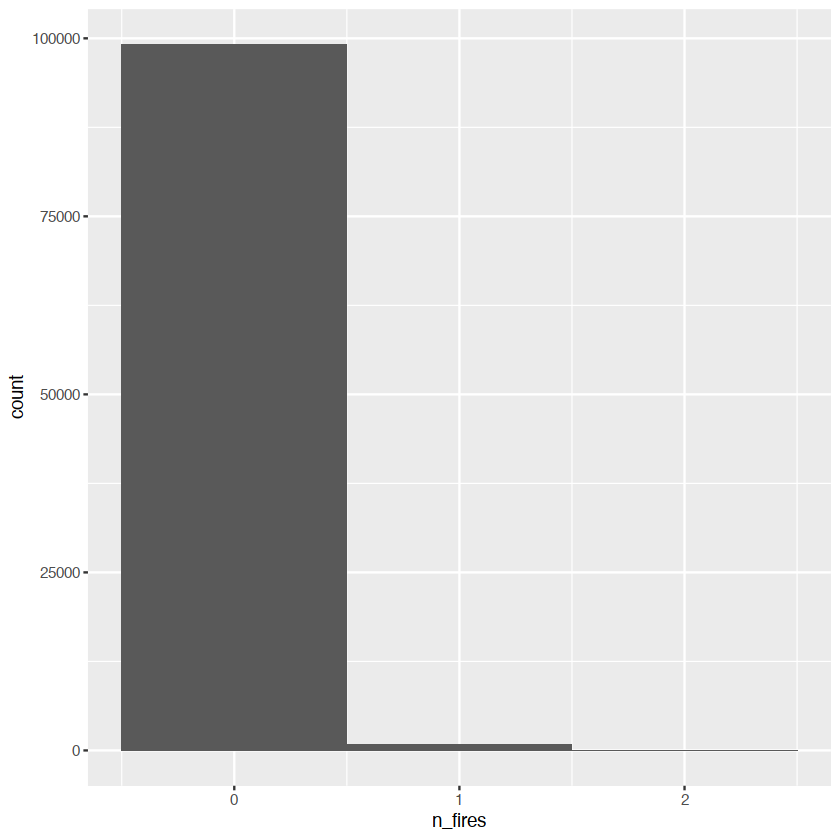

In [7]:
fire_simulation <- tibble(n_fires = sims)

# Your answer here!

# START
ggplot(data = fire_simulation, aes(x = n_fires)) + geom_histogram(binwidth = 1)
# END

**e. In how many simulation runs was there at least one fire in 30 years?**

In [8]:
# Your answer here!

# START
# Here are three ways to get the same answer:

sum(sims >= 1)

sum(fire_simulation$n_fires >= 1)

summarize(fire_simulation, atleastone = sum(n_fires >= 1))

# END

[1] 859

[1] 859

atleastone
<int>
859


**f. Suppose that due to climate change, the annual fire probability increases by 0.00001 (one in one-thousandth of a percentage point) each year, starting from 0.00031 in year 1, so that the probability is expected to roughly double by year 30. Now, in how many simulation runs was there at least one fire in 30 years? Compare this to the case when the annual probability is fixed at 0.0003**

HINT: You can create a vector of years 1 through 30 using `1:years`.

In [9]:
set.seed(1) 

# Your answer here!

# START

# Define annual fire probability
p_fire_increasing <- .0003 + .00001 * 1:years 
head(p_fire_increasing)

# Simulate fires given increasing probability
sims_2 <- replicate(num_sims, sum(rbernoulli(years, p_fire_increasing)))

# Count simulations with 1 or more fires
sum(sims_2 >= 1)

# END

[1] 0.00031 0.00032 0.00033 0.00034 0.00035 0.00036

[1] 1248

**g. Calculate the expected number of fires using the simulated fires.**

In [10]:
# Your answer here!

# START

mean(sims_2)

# END

[1] 0.01257

We can calculate the number of fires over 30 years through simulation by taking the mean of simulated number of fires. As the number of simulations increases, this will come closer and closer to the true expectation.

## Exercise 2: Household Income Inequality

The data below comes from the US Census Current Population Survey and describes the income distribution of US households in 2021. It counts US households in thousands within each of 5 quintiles. Each quintile comprises 20% of households ranked by income. Therefore quintile 1 is the bottom 20% of US households by income, quintile 2 is the next lowest 20%, and 5 comprises households with the top 20% of incomes. 

* `pop_tot`: total households in quintile (thousands)
* `pop_white`: white households in quintile (thousands)
* `pop_black`: black households in quintile (thousands)

Notice `pop_tot` is constant across quintiles because each quintile has the same total number of households. 

In [11]:
# SETUP
income_distribution <- tribble(
    ~income_quintile, ~pop_tot, ~pop_white, ~pop_black,
    1,                26240,    18624,      5490,    
    2,                26240,    20056,      4291,
    3,                26240,    20717,      3493,
    4,                26240,    21293,      2592,
    5,                26240,    21367,      1832  
)

income_distribution

income_quintile,pop_tot,pop_white,pop_black
<dbl>,<dbl>,<dbl>,<dbl>
1,26240,18624,5490
2,26240,20056,4291
3,26240,20717,3493
4,26240,21293,2592
5,26240,21367,1832


**a. What is the most likely income quintile for a white household to be in? A black household?**

#### Your answer here!

##### START

White households are most likely to be in quintile 5, the top 20% of the income distribution, although not much more likely than any of the other quintiles. 

Black households are most likely to be in quintile 1, the bottom 20% of the income distribution, and are almost three times more likely to be in this quintile than they are to be in quintile 5.

##### END

**b. What is the probability of a white household falling in the top 40 percent of the income distribution (quintiles 4 or 5)? What about a black household?**

In [12]:
# Your answer here!

# START
# Calculate conditional probabilities for each race
income_distribution_probs <- income_distribution %>% 
    mutate(pr_quint_white = pop_white / sum(pop_white),
           pr_quint_black = pop_black / sum(pop_black)) 

# Sum the conditional probabilities of the top two quintiles 
income_distribution_probs %>%
    filter(income_quintile >= 4) %>%
    summarize(`Prob. Top 40% if White` = sum(pr_quint_white), 
              `Prob. Top 40% if Black` = sum(pr_quint_black))
# END


Prob. Top 40% if White,Prob. Top 40% if Black
<dbl>,<dbl>
0.4180017,0.2499717


**c. What are the expected income quintiles of white and black households?**

In [ ]:
# Your answer here!

# START
summarize(income_distribution_probs,
          `Expectation if White` = sum(income_quintile * pr_quint_white),
          `Expectation if Black` = sum(income_quintile * pr_quint_black))
# END